In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [3]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy

### Import LDA document vectors

In [9]:
lda_10_matrix = np.load('../../processed_files/lda/lda_10_matrix.npy')
lda_25_matrix = np.load('../../processed_files/lda/lda_25_matrix.npy')
lda_50_matrix = np.load('../../processed_files/lda/lda_50_matrix.npy')
df = pickle.load(open("../../processed_files/webis/df.pickle", "rb"))

In [10]:
lda_10_matrix.shape

(15718, 20)

In [11]:
lda_25_matrix.shape

(15718, 20)

In [12]:
lda_50_matrix.shape

(15718, 20)

In [13]:
df.head()

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[comte, would, advise, irrational, proceeding,...",[m. comte would not advise so irrational a pro...
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even, comte, would, spurn, irrational, reason...",[even m. comte would spurn such irrational rea...
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture, illustrating, shortest, easiest, way...",[picture illustrating the shortest and easiest...
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[picture, exemplifies, straight, easiest, way,...",[this picture exemplifies the straight and eas...
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, course, bill, going, get, sooner, later...","[thad, of course. and, bill, we're going to ge..."


In [14]:
df.shape

(15718, 7)

In [15]:
type(lda_10_matrix[0])

numpy.ndarray

In [16]:
type(lda_10_matrix[0])

numpy.ndarray

In [17]:
type(lda_10_matrix[0])

numpy.ndarray

In [18]:
np.average(lda_10_matrix[[0, 1, 2]], axis=0)

array([0.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33333333, 0.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.        ])

## DB Scan

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
# eps (default 0.5): the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples (default 5): number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself
# algorithm (default 'auto'): ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’
lda_10_dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(lda_10_matrix)
lda_25_dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(lda_25_matrix)
lda_50_dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(lda_50_matrix)

In [21]:
lda_10_dbscan.labels_

array([ 0,  1,  2, ..., 17, 18,  5])

In [22]:
lda_25_dbscan.labels_

array([ 0,  1,  2, ..., 15, 12,  4])

In [23]:
lda_50_dbscan.labels_

array([ 0,  1,  2, ...,  1,  6, 17])

In [24]:
lda_10_num_clusters = max(lda_10_dbscan.labels_)
lda_25_num_clusters = max(lda_25_dbscan.labels_)
lda_50_num_clusters = max(lda_50_dbscan.labels_)

In [25]:
lda_10_num_clusters

19

In [26]:
lda_25_num_clusters

19

In [27]:
lda_50_num_clusters

19

In [28]:
lda_10_index_cluster = zip(range(len(lda_10_dbscan.labels_)), lda_10_dbscan.labels_)
lda_10_index_cluster_dict = dict(lda_10_index_cluster)
lda_25_index_cluster = zip(range(len(lda_25_dbscan.labels_)), lda_25_dbscan.labels_)
lda_25_index_cluster_dict = dict(lda_25_index_cluster)
lda_50_index_cluster = zip(range(len(lda_50_dbscan.labels_)), lda_50_dbscan.labels_)
lda_50_index_cluster_dict = dict(lda_50_index_cluster)

In [29]:
lda_10_index_cluster_dict[456]

6

In [30]:
lda_25_index_cluster_dict[456]

18

In [31]:
lda_50_index_cluster_dict[456]

4

In [32]:
lda_10_cluster_index = list(zip(lda_10_dbscan.labels_, range(len(lda_10_dbscan.labels_))))
lda_25_cluster_index = list(zip(lda_25_dbscan.labels_, range(len(lda_25_dbscan.labels_))))
lda_50_cluster_index = list(zip(lda_50_dbscan.labels_, range(len(lda_50_dbscan.labels_))))

In [33]:
lda_10_cluster_list = dict()
for i in range(lda_10_num_clusters):
    lda_10_cluster_list[i] = list(filter(lambda row: row[0] == i, lda_10_cluster_index))
lda_25_cluster_list = dict()
for i in range(lda_25_num_clusters):
    lda_25_cluster_list[i] = list(filter(lambda row: row[0] == i, lda_25_cluster_index))
lda_50_cluster_list = dict()
for i in range(lda_50_num_clusters):
    lda_50_cluster_list[i] = list(filter(lambda row: row[0] == i, lda_50_cluster_index))

In [34]:
for i in range(lda_10_num_clusters):
    print('cluster: ', i, 'size: ', len(lda_10_cluster_list[i]))

cluster:  0 size:  756
cluster:  1 size:  753
cluster:  2 size:  812
cluster:  3 size:  765
cluster:  4 size:  786
cluster:  5 size:  752
cluster:  6 size:  793
cluster:  7 size:  776
cluster:  8 size:  973
cluster:  9 size:  799
cluster:  10 size:  790
cluster:  11 size:  786
cluster:  12 size:  745
cluster:  13 size:  814
cluster:  14 size:  733
cluster:  15 size:  769
cluster:  16 size:  799
cluster:  17 size:  752
cluster:  18 size:  783


In [35]:
for i in range(lda_25_num_clusters):
    print('cluster: ', i, 'size: ', len(lda_25_cluster_list[i]))

cluster:  0 size:  770
cluster:  1 size:  772
cluster:  2 size:  791
cluster:  3 size:  700
cluster:  4 size:  769
cluster:  5 size:  769
cluster:  6 size:  790
cluster:  7 size:  768
cluster:  8 size:  796
cluster:  9 size:  808
cluster:  10 size:  987
cluster:  11 size:  801
cluster:  12 size:  806
cluster:  13 size:  776
cluster:  14 size:  770
cluster:  15 size:  798
cluster:  16 size:  761
cluster:  17 size:  740
cluster:  18 size:  784


In [36]:
for i in range(lda_50_num_clusters):
    print('cluster: ', i, 'size: ', len(lda_50_cluster_list[i]))

cluster:  0 size:  794
cluster:  1 size:  792
cluster:  2 size:  787
cluster:  3 size:  823
cluster:  4 size:  761
cluster:  5 size:  766
cluster:  6 size:  689
cluster:  7 size:  773
cluster:  8 size:  775
cluster:  9 size:  776
cluster:  10 size:  791
cluster:  11 size:  788
cluster:  12 size:  764
cluster:  13 size:  973
cluster:  14 size:  789
cluster:  15 size:  766
cluster:  16 size:  779
cluster:  17 size:  758
cluster:  18 size:  785


In [37]:
#len(cluster_list[0])

In [38]:
#len(cluster_list[1])

In [39]:
#len(cluster_list[2])

In [40]:
#len(cluster_list[num_clusters-1])

In [41]:
#cluster_list[1]

In [42]:
#[i[1] for i in cluster_list[0]]

In [43]:
import statistics

# index is cluster index
def lda_10_intracluster_similarity(index):
    cluster_centroid = np.average(lda_10_matrix[[i[1] for i in lda_10_cluster_list[index]]], axis=0)
    dist_list = []
    cluster = lda_10_cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-lda_10_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

# index is cluster index
def lda_25_intracluster_similarity(index):
    cluster_centroid = np.average(lda_25_matrix[[i[1] for i in lda_25_cluster_list[index]]], axis=0)
    dist_list = []
    cluster = lda_25_cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-lda_25_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

# index is cluster index
def lda_50_intracluster_similarity(index):
    cluster_centroid = np.average(lda_50_matrix[[i[1] for i in lda_50_cluster_list[index]]], axis=0)
    dist_list = []
    cluster = lda_50_cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-lda_50_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [44]:
lda_10_intracluster_similarity(0)

(0.0, 0.0)

In [45]:
lda_25_intracluster_similarity(0)

(0.0, 0.0)

In [46]:
lda_50_intracluster_similarity(0)

(0.0, 0.0)

In [47]:
# index is cluster / cluster id
def generate_raw_content_cluster_10_df(index):
    index_list = lda_10_cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df.loc[index].to_frame().T
    #cluster_df = df.loc[index_list[1:]]
    cluster_df = df.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

def generate_raw_content_cluster_25_df(index):
    index_list = lda_25_cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df.loc[index].to_frame().T
    #cluster_df = df.loc[index_list[1:]]
    cluster_df = df.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

def generate_raw_content_cluster_50_df(index):
    index_list = lda_50_cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df.loc[index].to_frame().T
    #cluster_df = df.loc[index_list[1:]]
    cluster_df = df.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [57]:
generate_raw_content_cluster_10_df(10)

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed,cluster
10,1002,original.txt,1002-original.txt,For example: There is a saying of the Emperor ...,True,"[example, saying, emperor, tschun, bc, teach, ...",[for example: there is a saying of the emperor...,10
55,1022,paraphrase.txt,1022-paraphrase.txt,"Marguerite's proof, the crown being found in h...",True,"[marguerites, pro, crown, found, pocket, behav...","[marguerite's proof, the crown being found in ...",10
59,1024,paraphrase.txt,1024-paraphrase.txt,"Wide laces are used extensively, covering the ...",True,"[wide, laces, used, extensively, covering, bod...","[wide laces are used extensively, covering the...",10
64,1027,original.txt,1027-original.txt,"""These lords, for lucre of money,"" (to use the...",False,"[lords, lucre, money, use, words, manuscript, ...","[""these lords, for lucre of money,"" (to use th...",10
66,1028,original.txt,1028-original.txt,"""These lords, for lucre of money,"" (to use the...",False,"[lords, lucre, money, use, words, manuscript, ...","[""these lords, for lucre of money,"" (to use th...",10
68,1029,original.txt,1029-original.txt,"""These lords, for lucre of money,"" (to use the...",True,"[lords, lucre, money, use, words, manuscript, ...","[""these lords, for lucre of money,"" (to use th...",10
99,1042,paraphrase.txt,1042-paraphrase.txt,They were going to break up. They could only f...,True,"[going, break, could, feel, bits, pieces, othe...",[they were going to break up. they could only ...,10
100,1043,original.txt,1043-original.txt,"I suppose the remark, so far as it applies to ...",True,"[suppose, remark, far, applies, reliccrazed, c...","[i suppose the remark, so far as it applies to...",10
118,1051,original.txt,1051-original.txt,"Then he turned on his heel, and opened Diana's...",True,"[turned, heel, opened, dianas, door, without, ...","[then he turned on his heel, and opened diana'...",10
125,1054,paraphrase.txt,1054-paraphrase.txt,"""The galatea does not happen to soul continuou...",False,"[galatea, happen, soul, continuous, injury, ea...","[""the galatea does not happen to soul continuo...",10


In [58]:
generate_raw_content_cluster_25_df(10)

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed,cluster
10,1002,original.txt,1002-original.txt,For example: There is a saying of the Emperor ...,True,"[example, saying, emperor, tschun, bc, teach, ...",[for example: there is a saying of the emperor...,10
16,1005,original.txt,1005-original.txt,The secrets of Melpomene are known to Miss Ter...,True,"[secrets, melpomene, known, miss, terry, secre...",[the secrets of melpomene are known to miss te...,10
25,1009,paraphrase.txt,1009-paraphrase.txt,Woburn Abbey. General Braddock. -- I need inf...,True,"[woburn, abbey, general, braddock, need, infor...",[woburn abbey. general braddock. -- i need in...,10
64,1027,original.txt,1027-original.txt,"""These lords, for lucre of money,"" (to use the...",False,"[lords, lucre, money, use, words, manuscript, ...","[""these lords, for lucre of money,"" (to use th...",10
65,1027,paraphrase.txt,1027-paraphrase.txt,"""These lords, for lucre of money,"" (to use the...",False,"[lords, lucre, money, use, words, manuscriptap...","[""these lords, for lucre of money,"" (to use th...",10
66,1028,original.txt,1028-original.txt,"""These lords, for lucre of money,"" (to use the...",False,"[lords, lucre, money, use, words, manuscript, ...","[""these lords, for lucre of money,"" (to use th...",10
68,1029,original.txt,1029-original.txt,"""These lords, for lucre of money,"" (to use the...",True,"[lords, lucre, money, use, words, manuscript, ...","[""these lords, for lucre of money,"" (to use th...",10
109,1047,paraphrase.txt,1047-paraphrase.txt,,False,[],[ ],10
113,1049,paraphrase.txt,1049-paraphrase.txt,"I was out fishing, last Friday, the 10th, when...",True,"[fishing, last, friday, th, friends, caught, p...","[i was out fishing, last friday, the 10th, whe...",10
123,1053,paraphrase.txt,1053-paraphrase.txt,"""The goddess seems to have survived the fall. ...",True,"[goddess, seems, survived, fall, need, lop, br...","[""the goddess seems to have survived the fall....",10


In [59]:
generate_raw_content_cluster_50_df(10)

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed,cluster
10,1002,original.txt,1002-original.txt,For example: There is a saying of the Emperor ...,True,"[example, saying, emperor, tschun, bc, teach, ...",[for example: there is a saying of the emperor...,10
20,1007,original.txt,1007-original.txt,"The rusts that occur on clovers, beans, and pe...",True,"[rusts, occur, clovers, beans, peas, cause, se...","[the rusts that occur on clovers, beans, and p...",10
64,1027,original.txt,1027-original.txt,"""These lords, for lucre of money,"" (to use the...",False,"[lords, lucre, money, use, words, manuscript, ...","[""these lords, for lucre of money,"" (to use th...",10
66,1028,original.txt,1028-original.txt,"""These lords, for lucre of money,"" (to use the...",False,"[lords, lucre, money, use, words, manuscript, ...","[""these lords, for lucre of money,"" (to use th...",10
68,1029,original.txt,1029-original.txt,"""These lords, for lucre of money,"" (to use the...",True,"[lords, lucre, money, use, words, manuscript, ...","[""these lords, for lucre of money,"" (to use th...",10
104,1045,original.txt,1045-original.txt,When he had finished it he showed it to some o...,True,"[finished, showed, colleagues, ir, adhesion, o...",[when he had finished it he showed it to some ...,10
106,1046,original.txt,1046-original.txt,When he had finished it he showed it to some o...,False,"[finished, showed, colleagues, ir, adhesion, o...",[when he had finished it he showed it to some ...,10
108,1047,original.txt,1047-original.txt,"She looked up at the man before her, and saw h...",False,"[looked, man, saw, tall, slim, subtlefeatured,...","[she looked up at the man before her, and saw ...",10
110,1048,original.txt,1048-original.txt,"She looked up at the man before her, and saw h...",True,"[looked, man, saw, tall, slim, subtlefeatured,...","[she looked up at the man before her, and saw ...",10
139,1060,paraphrase.txt,1060-paraphrase.txt,"In a short space, all curious and fair monumen...",False,"[short, space, curious, fair, monument, buries...","[in a short space, all curious and fair monume...",10


In [60]:
lda_10_avg_list = []
lda_10_variance_list = []

for i in range(lda_10_num_clusters):
    avg, variance = lda_10_intracluster_similarity(i)
    lda_10_avg_list.append(avg)
    lda_10_variance_list.append(variance)
    #print()

lda_25_avg_list = []
lda_25_variance_list = []

for i in range(lda_25_num_clusters):
    avg, variance = lda_25_intracluster_similarity(i)
    lda_25_avg_list.append(avg)
    lda_25_variance_list.append(variance)
    #print()
    
lda_50_avg_list = []
lda_50_variance_list = []

for i in range(lda_50_num_clusters):
    avg, variance = lda_50_intracluster_similarity(i)
    lda_50_avg_list.append(avg)
    lda_50_variance_list.append(variance)
    #print()

([<matplotlib.axis.XTick at 0x1b5e80feb8>,
 <a list of 11 Text xticklabel objects>)

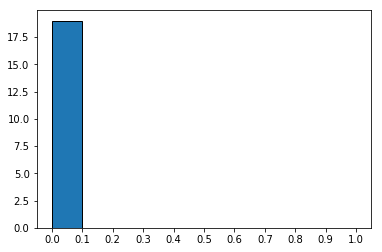

In [61]:
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(lda_10_avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

([<matplotlib.axis.XTick at 0x1b5e924a58>,
 <a list of 11 Text xticklabel objects>)

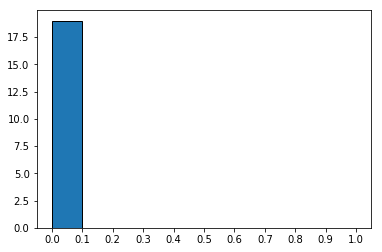

In [62]:
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(lda_25_avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

([<matplotlib.axis.XTick at 0x1b5e9a5ef0>,
 <a list of 11 Text xticklabel objects>)

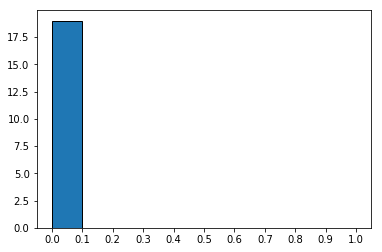

In [63]:
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(lda_50_avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [64]:
def lda_10_intercluster_dist():
    indices = range(lda_10_num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(lda_10_matrix[[x[1] for x in lda_10_cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(lda_10_matrix[[x[1] for x in lda_10_cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

def lda_25_intercluster_dist():
    indices = range(lda_25_num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(lda_25_matrix[[x[1] for x in lda_25_cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(lda_25_matrix[[x[1] for x in lda_25_cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

def lda_50_intercluster_dist():
    indices = range(lda_50_num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(lda_50_matrix[[x[1] for x in lda_50_cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(lda_50_matrix[[x[1] for x in lda_50_cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

In [65]:
intercluster_distances, values = lda_10_intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 1.4142135623730956


In [66]:
intercluster_distances, values = lda_25_intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 1.4142135623730956


In [67]:
intercluster_distances, values = lda_50_intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 1.4142135623730956
